In [1]:
using JLD2

In [1]:
f = load("/pscratch/sd/m/maadrian/samples/A0.jld2")

Dict{String, Any} with 1 entry:
  "single_stored_object" => [1.1666e6 4.43074e5 … 441661.0 1.16519e6; 2.57013 5…

In [2]:
f["single_stored_object"]

20×1024 Matrix{Float64}:
     1.1666e6       4.43074e5  …  441661.0            1.16519e6
     2.57013        5.44446            3.22696        6.10128
     1.81765        3.72778            4.19412        2.28399
     0.316074       1.49362            1.34413        2.52167
  1328.34         401.385           1978.3         1051.34
     1.20807e5  47520.7        …   78581.4            1.51867e5
 36831.2        14265.8            44896.6        22331.2
     2.26617        0.579095           1.09642        2.78349
     1.15195        2.17886            0.981461       2.00838
  1015.33        3411.31             720.518       3116.49
   440.001        976.452      …    1036.17         499.724
    30.314         55.5869            12.1984        37.4713
   112.203        410.613             80.1473       378.557
  1530.69         603.76            1394.91         467.979
 47951.7            1.5966e5           1.97841e5  86133.1
     1.53063e5  65222.0        …       1.16177e5  28335.5
 146

In [3]:
hcat(f["single_stored_object"] , f["single_stored_object"] )

20×2048 Matrix{Float64}:
     1.1666e6       4.43074e5  …  441661.0            1.16519e6
     2.57013        5.44446            3.22696        6.10128
     1.81765        3.72778            4.19412        2.28399
     0.316074       1.49362            1.34413        2.52167
  1328.34         401.385           1978.3         1051.34
     1.20807e5  47520.7        …   78581.4            1.51867e5
 36831.2        14265.8            44896.6        22331.2
     2.26617        0.579095           1.09642        2.78349
     1.15195        2.17886            0.981461       2.00838
  1015.33        3411.31             720.518       3116.49
   440.001        976.452      …    1036.17         499.724
    30.314         55.5869            12.1984        37.4713
   112.203        410.613             80.1473       378.557
  1530.69         603.76            1394.91         467.979
 47951.7            1.5966e5           1.97841e5  86133.1
     1.53063e5  65222.0        …       1.16177e5  28335.5
 146

In [4]:
"dskmvskfsd"*string(3)*" "

"dskmvskfsd3 "

In [5]:
#@time begin
A = load("/pscratch/sd/m/maadrian/samples/A0.jld2")["single_stored_object"]
for i in 1:100
    A = hcat(A, load("/pscratch/sd/m/maadrian/samples/A"*string(i)*".jld2")["single_stored_object"])
end
#end

In [7]:
B = load("/pscratch/sd/m/maadrian/samples/B0.jld2")["single_stored_object"]
for i in 1:100
    B = hcat(B, load("/pscratch/sd/m/maadrian/samples/B"*string(i)*".jld2")["single_stored_object"])
end

In [110]:
# function that preprocesses either the res_A or res_B files
function preprocess_AB(r)
    return transpose(reduce(hcat,r))
end

preprocess_AB (generic function with 1 method)

In [118]:
res_B = preprocess_AB(load("/pscratch/sd/m/maadrian/samples/res_B0.jld2")["single_stored_object"])

for i in 1:10
    file = load("/pscratch/sd/m/maadrian/samples/res_B"*string(i)*".jld2")["single_stored_object"]
    res_B = vcat(res_B, preprocess_AB(file))
end

In [119]:
res_B

11264×6 Matrix{Float64}:
 0.0517291    0.000898371  0.449485     33.5783    19.8996    64.8142
 0.00778974   0.000614615  0.101746      9.25168   16.8332    33.0536
 0.00240239   0.0120769    0.00640463   36.3931    24.3877    46.0725
 7.12999e-5   0.000448668  0.000927825   1.54412    5.63499   11.0032
 0.0157596    0.000260982  0.472395     12.6331     5.18543   26.8699
 0.00027153   0.0013881    2.6572e-5    12.8458    11.2864    44.7333
 6.88506e-5   0.000782324  0.000225737   2.30257    2.8069     3.73998
 0.00393515   0.00376667   0.0113257    18.4004    63.7067    38.8199
 0.0312022    0.000105062  0.150541      4.31135   15.2083    14.4755
 2.94259e-5   0.00121017   0.00069005    5.60772   22.3972    35.0286
 0.000141619  0.00182989   6.33805e-5    4.92412   19.913     57.6553
 0.00506579   0.000231957  0.0218773    20.7953     2.16742   29.9132
 0.0312434    0.000680642  0.152591      9.32759   24.0865     5.7164
 ⋮                                                             ⋮

KeyError: KeyError: key "usage_request" not found

In [88]:
res_C = load("/pscratch/sd/m/maadrian/samples/res_C0.jld2")["single_stored_object"];
#for i in 1:10
#    C = hcat(C, load("/pscratch/sd/m/maadrian/samples/res_C"*string(i)*".jld2")["single_stored_object"])
#end

In [124]:
#C # shape 20 x 11 (n params, N simulations)
#C[:,1] # length 20 vector (n params)
#C[:,1][1] # length N_sub_simulations 1024
#C[:,1][1][1] # length n vars
function preprocess_one_C_file(C)
    l = []
    for j in 1:length(C)
        test = C[j][1] # shape: (vars, n_sub_simulations) 
        for i in 2:length(C[j])
            test = hcat(test, C[j][i])
        end
        push!(l,test)
    end
    return l
end

preprocess_one_C_file (generic function with 1 method)

In [131]:
#initialize the vector with the first file
res_C = preprocess_one_file(load("/pscratch/sd/m/maadrian/samples/res_C0.jld2")["single_stored_object"])
#print((res_C[1]))
res_C = [transpose(res_C[n]) for n in 1:length(res_C)] # create a 20 long list of (n_simulations, n_params) matrix
for f in 1:2 #iterate through all the files
    file = load("/pscratch/sd/m/maadrian/samples/res_C"*string(f)*".jld2")["single_stored_object"]
    res_C = [vcat(res_C[n],transpose(preprocess_one_C_file(file)[n])) for n in 1:length(res_C)] # concatenate along the n_simulations dimension
end

In [132]:
res_C[1]

3072×6 Matrix{Float64}:
 0.0405036    0.00312967   0.455549     60.7871   15.2868     64.1925
 0.0251397    0.000327465  0.198852      6.05649  30.0747     33.701
 0.0014688    0.0129631    0.00607979   42.1354   24.3627     45.3882
 7.685e-5     0.000434778  0.000580018   1.17549   6.44764    11.2888
 0.0150574    0.000381206  0.665229     17.4683    3.69429    26.7662
 0.000576674  0.00134638   2.13204e-5   12.5501   19.2801     45.5044
 8.63031e-5   0.000579641  0.000165402   1.53103   3.3128      4.61523
 0.000870067  0.00426024   0.000256556  24.9079   52.4414     36.7605
 0.030681     0.000124023  0.223725      5.80542   9.73334    14.3835
 3.73165e-5   0.00115082   0.000771965   3.57928  22.6262     35.7151
 0.000659818  0.00165893   0.000108023   4.30297  40.0143     60.2196
 0.00265237   0.000313303  0.0449335    21.9966    0.850133   29.6065
 0.0084802    0.00268212   0.0414678    17.3774   26.0519      6.0499
 ⋮                                                             ⋮
 

In [ ]:
hcat(C[j], load("/pscratch/sd/m/maadrian/samples/res_C"*string(i)*".jld2")["single_stored_object"][j])

In [12]:
C = load("/pscratch/sd/m/maadrian/samples/res_C0.jld2")["single_stored_object"]
C

20-element Vector{Vector{Matrix{Float64}}}:
 [[0.04050359925683703; 0.0031296706254061585; … ; 15.286799530956392; 64.19252358432952;;], [0.02513968716757811; 0.0003274654419144634; … ; 30.074662024178128; 33.7009931353319;;], [0.0014687979444627166; 0.012963128863453804; … ; 24.36270793408147; 45.38821137234434;;], [7.684998655790859e-5; 0.0004347781732464885; … ; 6.4476389312451685; 11.288768723753034;;], [0.015057448111724813; 0.00038120644737775825; … ; 3.6942919058818435; 26.766157840393593;;], [0.0005766744828872612; 0.0013463760637058909; … ; 19.28013361377141; 45.504440484341224;;], [8.630305518097282e-5; 0.0005796411538652059; … ; 3.312796204782556; 4.6152259887986755;;], [0.0008700666667457782; 0.004260241387281547; … ; 52.44139143002096; 36.76049100358693;;], [0.030681041670318737; 0.00012402301234833068; … ; 9.733340418827002; 14.383548440967106;;], [3.731651384434355e-5; 0.0011508182413865462; … ; 22.626227074176786; 35.71507192593151;;]  …  [0.01201495440725281; 0.0003515

In [148]:
#using Sobol
#using Distributions
"""
C: list of (# simulations, # parameters) matrices, this list has length # of parameters
N: number of simulations from A and B
"""
function sobol(A_sol, B_sol, C_sol, K, vars, N, index = "first-order")   
    
    sums = zeros(4,vars)
    ya = A_sol #shape: (N, vars)  #solveODE(f, u0, vars, tspan, t, A, N)   
    yb = B_sol # shape: (N, vars) #solveODE(f, u0, vars, tspan, t, B, N)   
    sumC = zeros(K,vars) # (parameter, variable)
    
    for p in 1:K # iterates through changing one column of C at 
                 # a time (parameters)
        #C = Ci(p,A,B)
        yc = C_sol[p] #index the pth C (replaces B with the pth column of C) #solveODE(f, u0, vars, tspan, t, C, N)
                     # shape: (N, vars)
        
        for v in 1:vars
            if index == "first-order"
                sumC[p,v] = yc[:,v]'*ya[:,v]/N
            else
                sumC[p,v] = yc[:,v]'*yb[:,v]/N

            end
        end
    end  
    
    sens = zeros(K,vars) # (parameter, variable)
    

    for v in 1:vars 
        sums[1,v] = ya[:,v]'*ya[:,v]/N
      
                    # sum(ya^2)/N

        sums[2,v] = (sum(ya[:,v])/N)^2 # [sum(ya)/N]^2 
        sums[3,v] = sums[1, v] - sums[2,v] 
                    # denominator for sensitivity calculation
        sums[4,v] = sum(yb[:,v])*sum(ya[:,v])/N.^2 
                    # sum(ya)*sum(yb)/N^2
        
        for p in 1:K
            if index == "first-order"
                sens[p,v] = (sumC[p,v] - sums[4,v])/sums[3,v] 
            else
                sens[p,v] = 1 - (sumC[p,v] - sums[2,v])/sums[3,v]
            end
        end
    end
    return sens # matrix of sensitivity indices
end


sobol

In [144]:
resC = load("/pscratch/sd/m/maadrian/samples/res_C.jld2")["data"];

In [145]:
resA = load("/pscratch/sd/m/maadrian/samples/res_A.jld2")["data"];
resB = load("/pscratch/sd/m/maadrian/samples/res_B.jld2")["data"];

In [190]:
K = 20
vars = 6
N = 2^19
yticks = [""]

using Plots
first_order =sobol(resA, resB, resC, K, vars, N, "first-order")
#first_order[1:10,1:6]
using DelimitedFiles
writedlm( "first_order.csv",  first_order, ',')

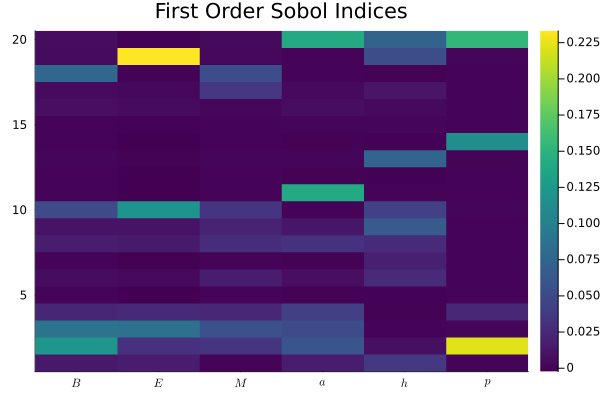

In [172]:
using LaTeXStrings
heatmap(first_order, title = "First Order Sobol Indices", c =:viridis, xticks = xticks = (1:6,[L"B",L"E",L"M", L"a", L"h", L"p"]))

In [177]:
total_order = sobol(resA, resB, resC, K, vars, N, "total-order") 

20×6 Matrix{Float64}:
 0.0994012   0.0858302   0.0897652    0.0647529   0.17745     0.021362
 0.446477    0.209614    0.265608     0.201142    0.157243    0.660519
 0.378719    0.298297    0.345529     0.286737    0.172729    0.024893
 0.12682     0.0980359   0.197298     0.165589    0.0933407   0.277644
 0.00662568  0.00451987  0.00606382  -0.00881922  0.00975142  0.0193178
 0.0632923   0.0456213   0.134106     0.0532514   0.124136    0.0199998
 0.00987047  0.0071566   0.0105585   -0.00681635  0.0755023   0.0192201
 0.119782    0.0935016   0.199727     0.228214    0.145943    0.0214085
 0.088531    0.0732428   0.168586     0.0612663   0.326595    0.0201161
 0.244206    0.286753    0.237981     0.0178842   0.164154    0.0289539
 0.00779456  0.00570909  0.00720918   0.27468     0.0156102   0.0197193
 0.00659532  0.00452165  0.00605826  -0.00874329  0.00966574  0.0193126
 0.0211656   0.0133038   0.0209806    0.00658928  0.198909    0.0197741
 0.00652537  0.00492398  0.00600208  -0.005015

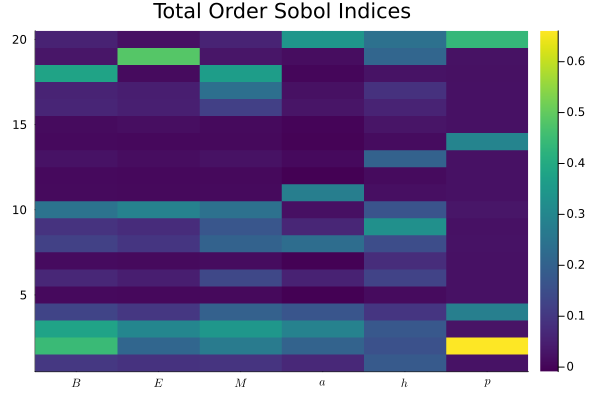

KeyError: KeyError: key "usage_request" not found

KeyError: KeyError: key "usage_request" not found

KeyError: KeyError: key "usage_request" not found

KeyError: KeyError: key "usage_request" not found

In [180]:
heatmap(total_order, title = "Total Order Sobol Indices", c =:viridis, xticks = xticks = (1:6,[L"B",L"E",L"M", L"a", L"h", L"p"]))

In [176]:
sum(first_order,dims = 1)

1×6 Matrix{Float64}:
 0.414788  0.522272  0.299895  0.499965  0.421278  0.508401

In [178]:
sum(total_order, dims=1)

1×6 Matrix{Float64}:
 2.20903  1.84929  2.50084  1.72971  2.31591  2.00059